In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Reading the Dataset

In [3]:
fuel_df = pd.read_csv('data/Fuel_Consumption_2000-2022.csv')

fuel_df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
fuel_df.shape

(22556, 13)

# Data Exploration and Preprocessing

In [5]:
fuel_df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


### Rimozione Dati Mancanti e Duplicati

In [6]:
fuel_df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [7]:
fuel_df.duplicated().sum()

1

In [8]:
# Drop duplicated rows
fuel_df.drop_duplicates(inplace=True)

In [9]:
fuel_df.shape

(22555, 13)

In [10]:
expdf = fuel_df[['ENGINE SIZE', 'CYLINDERS', 'COMB (L/100 km)', 'EMISSIONS']] # Chosen features to explore
expdf.head()

,ENGINE SIZE,CYLINDERS,COMB (L/100 km),EMISSIONS
0,1.6,4,8.1,186
1,1.6,4,7.6,175
2,3.2,6,10.0,230
3,3.5,6,11.5,264
4,1.8,4,8.6,198


Histograms of the selected Features

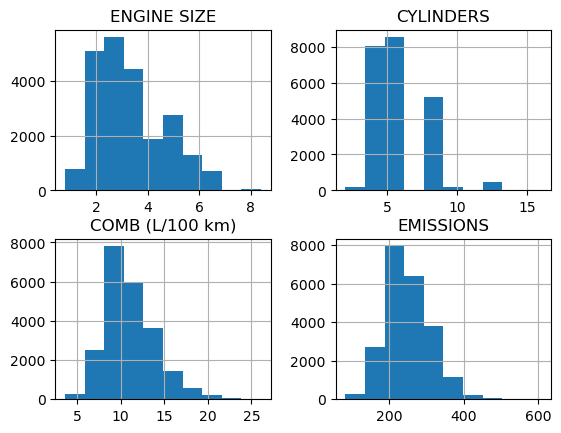

In [11]:
plot = expdf[['ENGINE SIZE', 'CYLINDERS', 'COMB (L/100 km)', 'EMISSIONS']]
plot.hist()
plt.show()

### Emissions/Fuel Consumption (COMB (L/100 km))

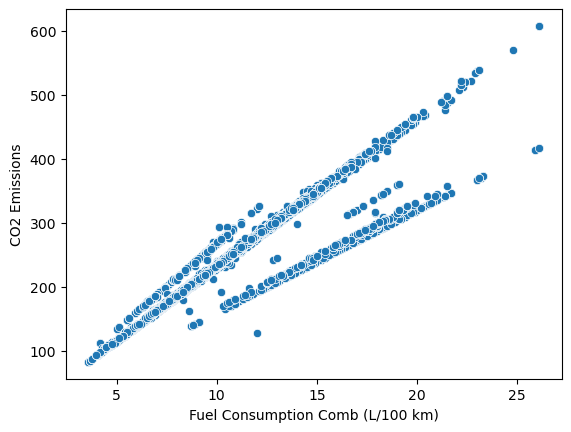

In [26]:
plt.scatter(expdf['COMB (L/100 km)'], expdf['EMISSIONS'], edgecolors='white', linewidths=0.5)
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions')
plt.show()

### Emissions/Engine Size

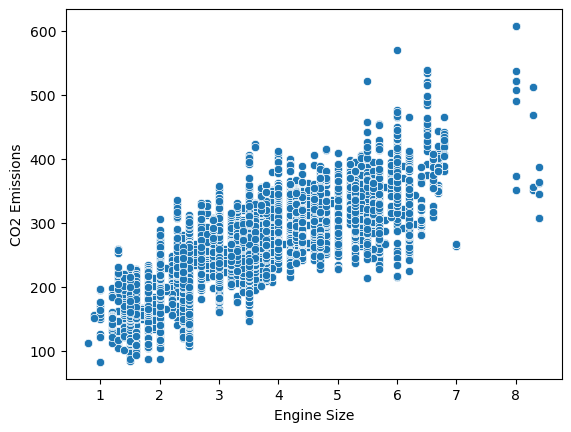

In [27]:
plt.scatter(expdf['ENGINE SIZE'], expdf['EMISSIONS'], edgecolors='white', linewidths=0.5)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### Emissions/Cylinders

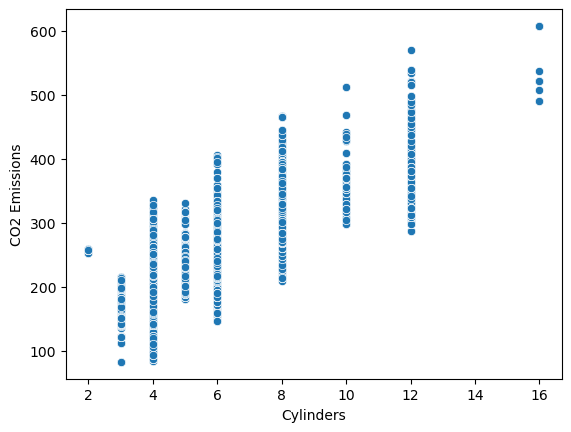

In [28]:
plt.scatter(expdf['CYLINDERS'], expdf['EMISSIONS'], edgecolors='white', linewidths=0.5)
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

# Model Training

### Train Test Split

In [15]:
X = expdf.drop(['EMISSIONS'], axis=1)
y = expdf['EMISSIONS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Normalization (StandardScaler)

In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### LinearRegression Training

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("LinearRegression:")
print(f"MSE: {mean_squared_error(y_test, lr_pred)}")
print(f"r2_score: {r2_score(y_test, lr_pred)}")

LinearRegression:
MSE: 465.981832572834
r2_score: 0.87125734875016


### SVM Training

In [18]:
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Support Vector Machine:")
print(f"MSE: {mean_squared_error(y_test, svm_pred)}")
print(f"r2_score: {r2_score(y_test, svm_pred)}")

Support Vector Machine:
MSE: 661.0738734307316
r2_score: 0.8173568212572517


# Results

## Actual vs Predicted Values: Linear Regressor and SVM Comparison

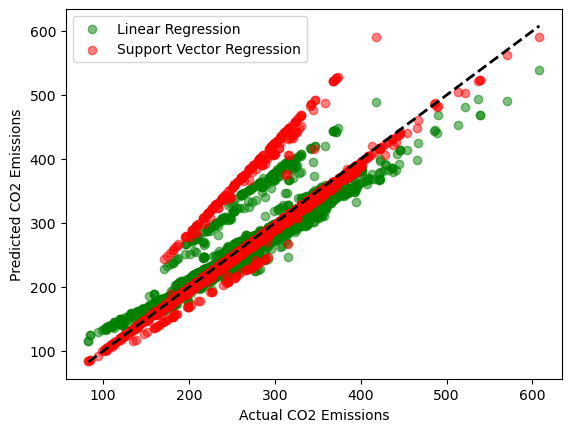

In [19]:
plt.scatter(y_test, lr_pred, color='green', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, svm_pred, color='red', alpha=0.5, label='Support Vector Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()
plt.show()